In [21]:
#################################################################
##    Marketing analytics                                      ##
##    Exercise in Segmentation AND Discriminant Analysis       ##
##    Churn Modelling Data                                     ##
#################################################################

#The libraries is used to construct classification trees.
library (tree)
library (ISLR)
library(randomForest)
library(shuffle)
library(caTools)

In [12]:
#Read the data
churnModellingData <- read.csv("C:/Users/busea/Downloads/churn_modelling.csv", header=T)

churnModellingData<-churnModellingData[-c(1:3)]

churnModellingData$Exited <- as.factor(churnModellingData$Exited)
churnModellingData$Tenure <- as.factor(churnModellingData$Tenure)
churnModellingData$HasCrCard <- as.factor(churnModellingData$HasCrCard)
churnModellingData$NumOfProducts <- as.factor(churnModellingData$NumOfProducts)
churnModellingData$IsActiveMember <- as.factor(churnModellingData$IsActiveMember)
churnModellingData$Gender = ifelse(churnModellingData$Gender == "Male", 1, 0)
churnModellingData$Gender <- as.factor(churnModellingData$Gender)
churnModellingData$Geography=factor(churnModellingData$Geography, 
                                 levels = c("France", "Germany", "Spain"), labels = c(1,2,3) )

In [13]:
#Observe a few examples
head(churnModellingData)
summary(churnModellingData)

CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
619,1,0,42,2,0.00,1,1,1,101348.88,1
608,3,0,41,1,83807.86,1,0,1,112542.58,0
502,1,0,42,8,159660.80,3,1,0,113931.57,1
699,1,0,39,1,0.00,2,0,0,93826.63,0
850,3,0,43,2,125510.82,1,1,1,79084.10,0
645,3,1,44,8,113755.78,2,1,0,149756.71,1


  CreditScore    Geography Gender        Age            Tenure    
 Min.   :350.0   1:5014    0:4543   Min.   :18.00   2      :1048  
 1st Qu.:584.0   2:2509    1:5457   1st Qu.:32.00   1      :1035  
 Median :652.0   3:2477             Median :37.00   7      :1028  
 Mean   :650.5                      Mean   :38.92   8      :1025  
 3rd Qu.:718.0                      3rd Qu.:44.00   5      :1012  
 Max.   :850.0                      Max.   :92.00   3      :1009  
                                                    (Other):3843  
    Balance       NumOfProducts HasCrCard IsActiveMember EstimatedSalary    
 Min.   :     0   1:5084        0:2945    0:4849         Min.   :    11.58  
 1st Qu.:     0   2:4590        1:7055    1:5151         1st Qu.: 51002.11  
 Median : 97199   3: 266                                 Median :100193.91  
 Mean   : 76486   4:  60                                 Mean   :100090.24  
 3rd Qu.:127644                                          3rd Qu.:149388.25  
 M

In [32]:
#cross validation
#Randomly shuffle the data
churnModellingData<-churnModellingData[sample(nrow(churnModellingData)),]

#Create 10 equally size folds
folds <- cut(seq(1,nrow(churnModellingData)),breaks=10,labels=FALSE)

#Perform 10 fold cross validation
for(i in 1:10){
  
  testIndexes <- which(folds==i,arr.ind=TRUE)
  testData <- churnModellingData[testIndexes, ]
  trainData <- churnModellingData[-testIndexes, ]
  treepredmodel = tree(formula= Exited~., data = trainData )

  #Test the predictions of the trained model
  testpredictions = predict(treepredmodel, testData, type ="class")
  
  #Find the accuracy of the model
  cm =table(testpredictions, testData$Exited)
  accuracy[i]= (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])

  #Display the accuracy of the model in test data
  print(accuracy[i])

}

[1] 0.837
[1] 0.841
[1] 0.87
[1] 0.855
[1] 0.837
[1] 0.85
[1] 0.838
[1] 0.865
[1] 0.841
[1] 0.844


In [33]:
#average accuracy for the model
accuracyDT= (accuracy[1]+accuracy[2]+accuracy[3]+accuracy[4]+accuracy[5]+accuracy[6]+accuracy[7]+accuracy[8]+accuracy[9]+accuracy[10])/10
print(accuracyDT)

[1] 0.8478


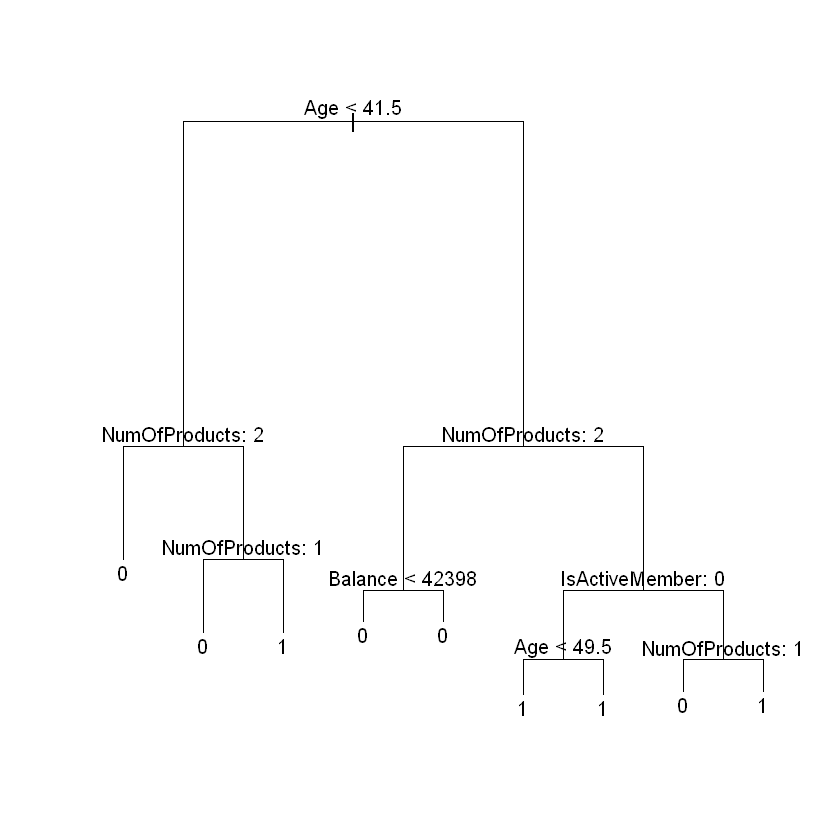

In [34]:
plot(treepredmodel)
text(treepredmodel,pretty=0)

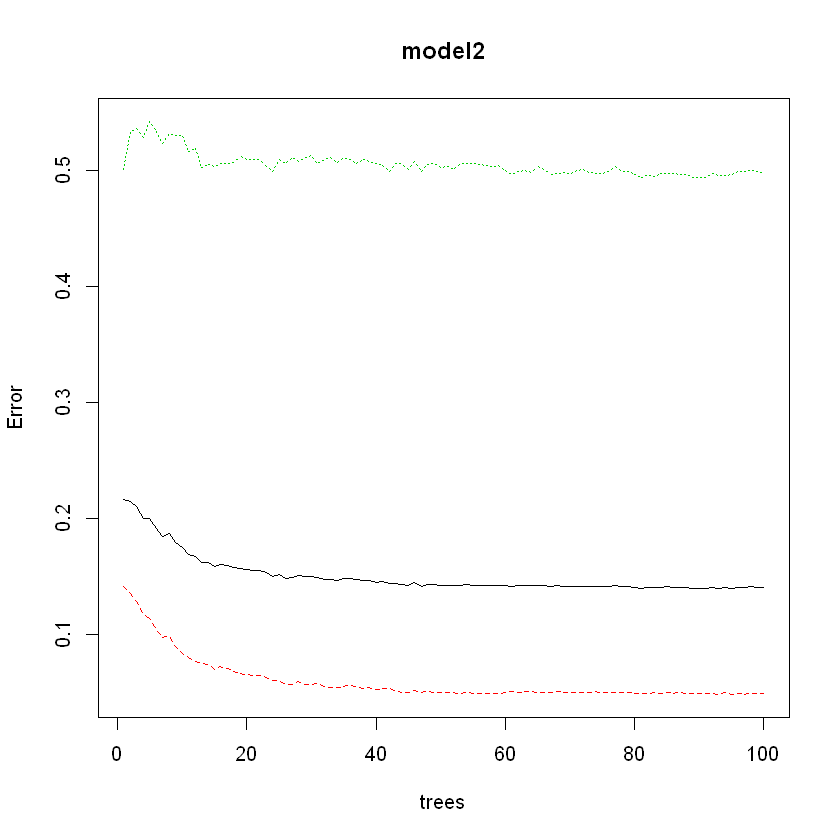

In [35]:
#Random Forest
set.seed(1234)

split=sample.split(churnModellingData, SplitRatio = 0.8)
trainData2=subset(churnModellingData, split == TRUE)
testData2=subset(churnModellingData, split == FALSE)

model2 =randomForest(as.factor(Exited) ~ ., data = trainData2, ntree=100)
plot(model2)

In [36]:
#Random Forest Predictions
testpredictions2= predict(model2,testData2)

#Find the accuracy of the model
cm =table(testpredictions2, testData2$Exited)

#Display the accuracy of the model in test data
accuracy2 = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
print(accuracy2)

[1] 0.8610194
